In [3]:
## Prepare the data

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
maindf=pd.merge(mouse_metadata, study_results, how='outer', on= 'Mouse ID')

# Display the data table for preview
maindf.head(2)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0


In [4]:
# Display number of unique mice ID's.

totmice=maindf['Mouse ID'].nunique()
totmice

249

In [5]:
# Check for any IDs with duplicate time points.
samemice_ID=maindf.loc[maindf.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
samemice_ID

array(['g989'], dtype=object)

In [6]:
# Display their data
samemicedf= maindf.loc[maindf['Mouse ID']=='g989', :]
samemicedf

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Remove these data points and use the updated dataframe
updatedf=maindf[maindf['Mouse ID'].isin(samemice_ID)==False]

updatedf.head(2)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0


In [8]:
totmiceup= updatedf['Mouse ID'].nunique()

totmiceup

248

In [9]:
## Generate Summary Statistics
# Create a DataFrame of summary stats including: 
#row for each drug regimen as the index
#columns: mean, median, variance, standard deviation, and SEM of tumor volume

avg=updatedf['Tumor Volume (mm3)'].groupby(updatedf['Drug Regimen']).mean()
median=updatedf['Tumor Volume (mm3)'].groupby(updatedf['Drug Regimen']).median()
var=updatedf['Tumor Volume (mm3)'].groupby(updatedf['Drug Regimen']).var()
sem=updatedf['Tumor Volume (mm3)'].groupby(updatedf['Drug Regimen']).sem()
stdev=updatedf['Tumor Volume (mm3)'].groupby(updatedf['Drug Regimen']).std()

In [10]:
summary=pd.DataFrame({'Average Tumor Vol':avg,
                      'Median Tumor Vol':median,
                      'Variance Tumor Vol':var,
                      'Standard Err. Vol':sem,
                      'Standard Dev. Tumor Vol':stdev,
                     })
summary

,Average Tumor Vol,Median Tumor Vol,Variance Tumor Vol,Standard Err. Vol,Standard Dev. Tumor Vol
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,0.329346,4.994774
Ceftamin,52.591172,51.776157,39.290177,0.469821,6.268188
Infubinol,52.884795,51.820584,43.128684,0.492236,6.567243
Ketapril,55.235638,53.698743,68.553577,0.603860,8.279709
Naftisol,54.331565,52.509285,66.173479,0.596466,8.134708
Placebo,54.033581,52.288934,61.168083,0.581331,7.821003
Propriva,52.320930,50.446266,43.852013,0.544332,6.622085
Ramicane,40.216745,40.673236,23.486704,0.320955,4.846308
Stelasyn,54.233149,52.431737,59.450562,0.573111,7.710419


In [11]:
## Create Bar/Pie Charts
# Generate how many mice was treated with each regimen
no_mice=updatedf['Drug Regimen'].value_counts()
no_mice

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

<AxesSubplot:title={'center':'# of Mice per Regimen'}, xlabel='Drug', ylabel='# of Mice'>

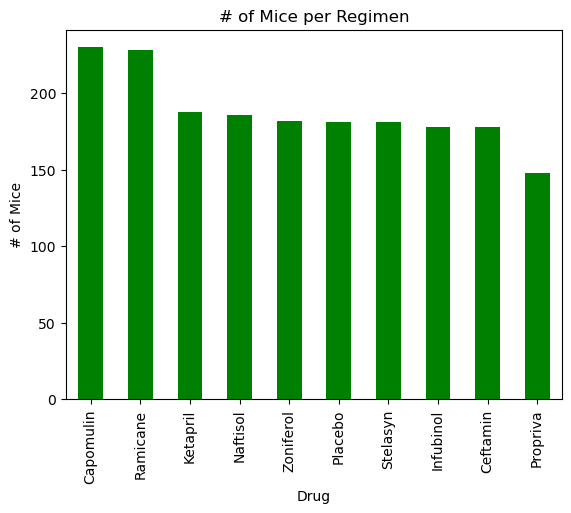

In [12]:
# Create a Bar Chart using pd DataFrame.plot
bar_pd=no_mice.plot.bar(color='g')
plt.xlabel('Drug')
plt.ylabel('# of Mice')
plt.title('# of Mice per Regimen')

bar_pd

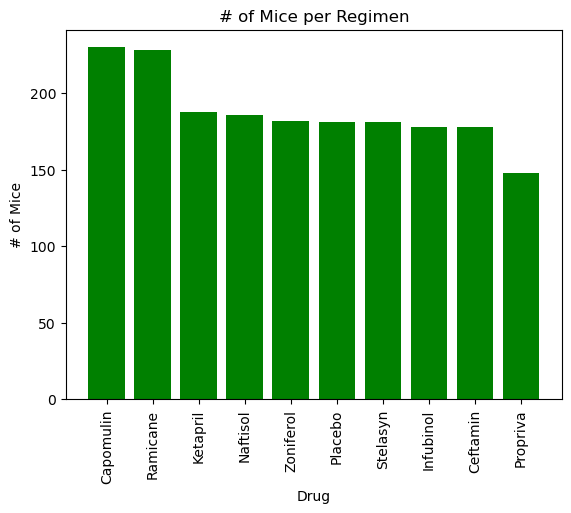

In [13]:
# Create an identical Bar using Matplotlib's pyplot
plt.bar(no_mice.index.values, no_mice.values, color='g', align='center')
plt.xlabel('Drug')
plt.ylabel('# of Mice')
plt.title('# of Mice per Regimen')
plt.xticks(rotation=90)

plt.show()

In [14]:
# Find data based on male v. female 
sex=updatedf['Sex'].value_counts()
sex

Male      958
Female    922
Name: Sex, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

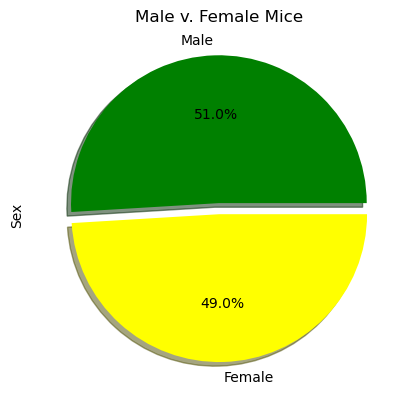

In [15]:
# Create a pie chart using pd DataFrame.plot
colors=['green', 'yellow']
explode=(0.075, 0)
sex.plot.pie(explode=explode,colors=colors, shadow=True, autopct='%1.1f%%')
plt.title('Male v. Female Mice')
plt.show

(-1.109233800941782,
 1.1004397048067516,
 -1.1119805254296127,
 1.1829944538669235)

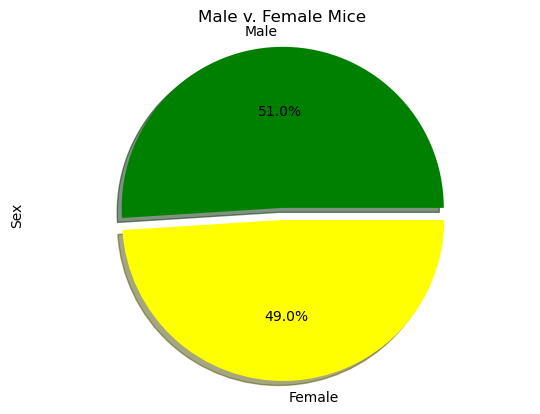

In [16]:
# Create an identical pie using Matplotlib's pyplot
labels= ['Male', 'Female']
colors=['green', 'yellow']
explode=(0.075, 0)
sizes=[51.0,49.0]
plt.pie(sizes, explode=explode, colors=colors, labels=labels, autopct='%1.1f%%', shadow=True)
plt.title('Male v. Female Mice')
plt.ylabel('Sex')
plt.axis('equal')

In [17]:
## Quartiles, Outliers, Box Plots
# Use a loop to create box plot data
# Create a list that will be filled
regimen_list=['Capomulin','Ramicane','Infubinol','Ceftamin']
regiments=maindf[maindf['Drug Regimen'].isin(regimen_list)]
regiments.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [18]:
fin_vol=regiments.groupby(['Drug Regimen', 'Mouse ID']).agg(tumor_size=('Tumor Volume (mm3)', lambda x:x.iloc[-1]))
fin_vol=fin_vol.stack(level=0).unstack(level=0)
# for regimen in regimen_list:
#     print(regimen)

In [19]:
tx=0
for regimen in regimen_list:
    quartiles=fin_vol[regimen].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
 #_______________________________________
    if tx == 0:
        print(f"------------------------------------------------------------")
    print(f"The lower quartile of {regimen} treatments is: {lowerq}")
    print(f"The upper quartile of {regimen} treatments is: {upperq}")
    print(f"The interquartile range of {regimen} treatments is: {iqr}")
    print(f"Values below {lower_bound} are possible {regimen} outliers.")
    print(f"Values above {upper_bound} are possible {regimen} outliers.")
    print(f"------------------------------------------------------------")
    tx+=1

------------------------------------------------------------
The lower quartile of Capomulin treatments is: 32.38
The upper quartile of Capomulin treatments is: 40.16
The interquartile range of Capomulin treatments is: 7.78
Values below 20.71 are possible Capomulin outliers.
Values above 51.83 are possible Capomulin outliers.
------------------------------------------------------------
The lower quartile of Ramicane treatments is: 31.56
The upper quartile of Ramicane treatments is: 40.66
The interquartile range of Ramicane treatments is: 9.1
Values below 17.91 are possible Ramicane outliers.
Values above 54.31 are possible Ramicane outliers.
------------------------------------------------------------
The lower quartile of Infubinol treatments is: 54.05
The upper quartile of Infubinol treatments is: 65.53
The interquartile range of Infubinol treatments is: 11.48
Values below 36.83 are possible Infubinol outliers.
Values above 82.75 are possible Infubinol outliers.
---------------------

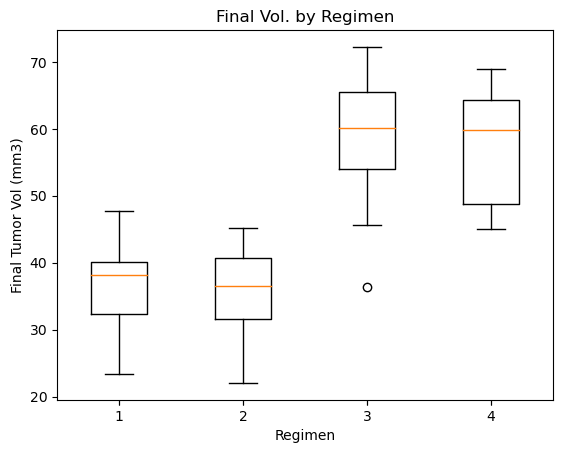

In [20]:
boxplot_loop = []
for regimen in regimen_list:
    boxplot_loop.append(list(fin_vol[regimen].dropna()))
    
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
orgfig = plt.figure()
plt.xlabel("Regimen")
plt.xticks([1,2,3,4], regimen_list, rotation=0)
plt.ylabel("Final Tumor Vol (mm3)")
plt.title("Final Vol. by Regimen")
plt.boxplot(boxplot_loop)
plt.show()

In [21]:
## Quartiles, Outliers, Box Plots
# Alternative method
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: 
#Capomulin, Ramicane, Infubinol, and Ceftamin. 
#Then, calculate the quartiles and IQR, 
#and determine if there are any potential outliers across all four treatment regimens. 

Capomulin=updatedf.loc[updatedf['Drug Regimen']=='Capomulin', :]
Ramicane=updatedf.loc[updatedf['Drug Regimen']=='Ramicane', :]
Infubinol=updatedf.loc[updatedf['Drug Regimen']=='Infubinol', :]
Ceftamin=updatedf.loc[updatedf['Drug Regimen']=='Ceftamin', :]

In [22]:
#Create a grouped DataFrame that shows the last (greatest) time point for each mouse. 
#Merge this grouped DataFrame with the original cleaned DataFrame.

Capomulin_rec=Capomulin.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol= pd.DataFrame(Capomulin_rec)
Capomulin_join=pd.merge(Capomulin_vol, updatedf, on=('Mouse ID', 'Timepoint'), how='left')
Capomulin_join.head(2)


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0


In [23]:
Ramicane_rec = Ramicane.groupby('Mouse ID').max()['Timepoint']
Ramicane_vol = pd.DataFrame(Ramicane_rec)
Ramicane_join = pd.merge(Ramicane_vol, updatedf, on=("Mouse ID","Timepoint"),how="left")
Ramicane_join.head(2)


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0


In [24]:
Infubinol_rec=Infubinol.groupby('Mouse ID').max()['Timepoint']
Infubinol_vol= pd.DataFrame(Infubinol_rec)
Infubinol_join=pd.merge(Capomulin_vol, updatedf, on=('Mouse ID', 'Timepoint'), how='left')
Infubinol_join.head(2)


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0


In [25]:
Ceftamin_rec=Ceftamin.groupby('Mouse ID').max()['Timepoint']
Ceftamin_vol= pd.DataFrame(Ceftamin_rec)
Ceftamin_join=pd.merge(Ceftamin_vol, updatedf, on=('Mouse ID', 'Timepoint'), how='left')
Ceftamin_join.head(2)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0


In [26]:
# Calculate quartiles and look for outliers
# Capomulin
Capomulin_tx = Capomulin_join["Tumor Volume (mm3)"]

quartiles =Capomulin_tx.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Capomulin tumors: {lowerq}")
print(f"The upper quartile of Capomulin tumors: {upperq}")
print(f"The interquartile range of Capomulin tumors: {iqr}")
print(f"The median of Capomulin tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The interquartile range of Capomulin tumors: 7.781863460000004
The median of Capomulin tumors: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [27]:
# Ramicane
Ramicane_tx = Ramicane_join["Tumor Volume (mm3)"]

quartiles =Ramicane_tx.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Ramicane tumors: {lowerq}")
print(f"The upper quartile of Ramicane tumors: {upperq}")
print(f"The interquartile range of Ramicane tumors: {iqr}")
print(f"The median of Ramicane tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane tumors: 31.56046955
The upper quartile of Ramicane tumors: 40.65900627
The interquartile range of Ramicane tumors: 9.098536719999998
The median of Ramicane tumors: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [28]:
# Infubinol
Infubinol_tx = Infubinol_join["Tumor Volume (mm3)"]

quartiles =Infubinol_tx.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Infubinol tumors: {lowerq}")
print(f"The upper quartile of Infubinol tumors: {upperq}")
print(f"The interquartile range of Infubinol tumors: {iqr}")
print(f"The median of Infubinol tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Infubinol tumors: 32.37735684
The upper quartile of Infubinol tumors: 40.1592203
The interquartile range of Infubinol tumors: 7.781863460000004
The median of Infubinol tumors: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [29]:
# Ceftamin
Ceftamin_tx = Ceftamin_join["Tumor Volume (mm3)"]

quartiles =Ceftamin_tx.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Ceftamin tumors: {lowerq}")
print(f"The upper quartile of Ceftamin tumors: {upperq}")
print(f"The interquartile range of Ceftamin tumors: {iqr}")
print(f"The median of Ceftamin tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ceftamin tumors: 48.72207785
The upper quartile of Ceftamin tumors: 64.29983003
The interquartile range of Ceftamin tumors: 15.577752179999997
The median of Ceftamin tumors: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


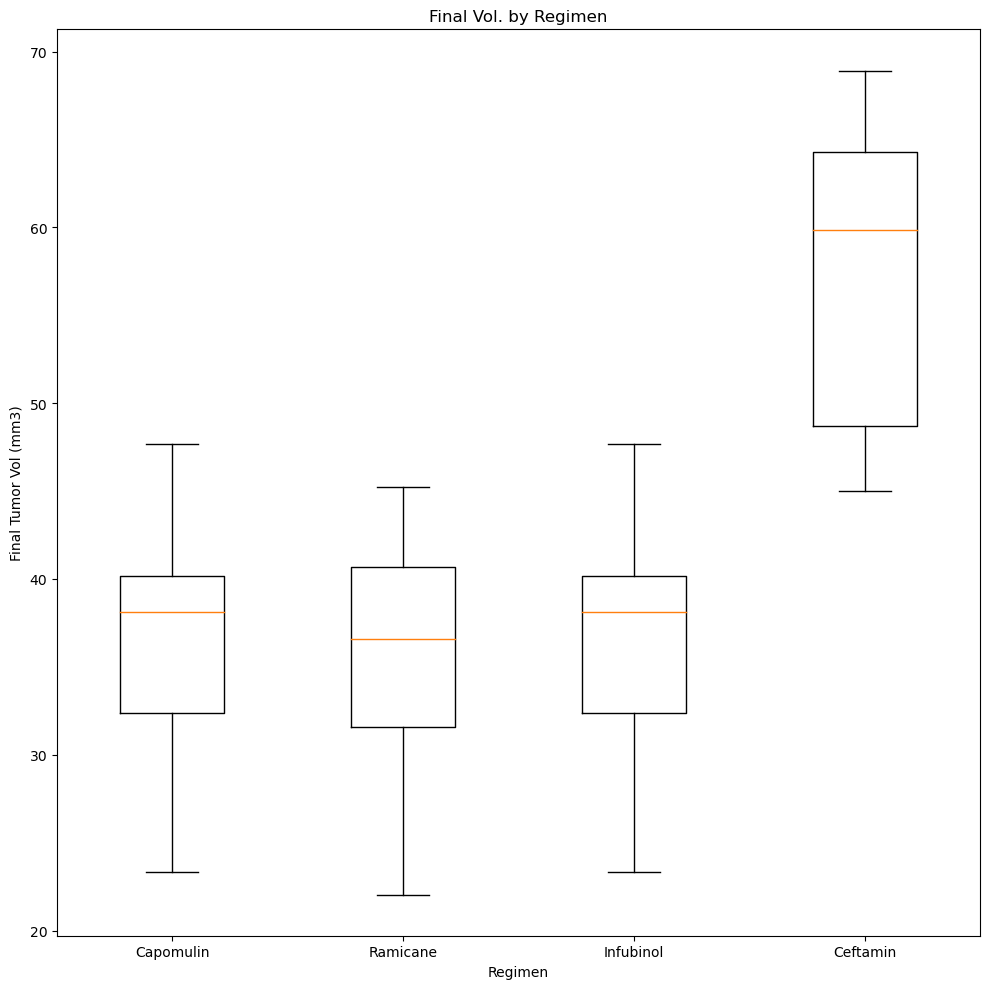

In [30]:
# Put all four box plots in the same figure
boxplots=[Capomulin_tx, Ramicane_tx, Infubinol_tx, Ceftamin_tx]
regimens=['Capomulin','Ramicane','Infubinol','Ceftamin']

fig1,ax1=plt.subplots(figsize=(10,10))
ax1.set_title('Final Vol. by Regimen')
ax1.set_xlabel('Regimen')
ax1.set_ylabel('Final Tumor Vol (mm3)')
ax1.boxplot(boxplots,labels=regimens, vert=True)
plt.tight_layout()
plt.show()

In [31]:
## Line/Scatter Plots
# Line plot for tumor vol vs time pt for a mouse treated with Capomulin

linedf=Capomulin.loc[Capomulin['Mouse ID']=='g316', :]
linedf

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
351,g316,Capomulin,Female,22,22,0,45.000000,0
352,g316,Capomulin,Female,22,22,5,44.022752,0
353,g316,Capomulin,Female,22,22,10,44.502042,0
354,g316,Capomulin,Female,22,22,15,45.216743,0
355,g316,Capomulin,Female,22,22,20,45.933322,1
356,g316,Capomulin,Female,22,22,25,46.809225,1
357,g316,Capomulin,Female,22,22,30,44.221480,2
358,g316,Capomulin,Female,22,22,35,44.702833,2
359,g316,Capomulin,Female,22,22,40,45.565821,2
360,g316,Capomulin,Female,22,22,45,40.159220,2


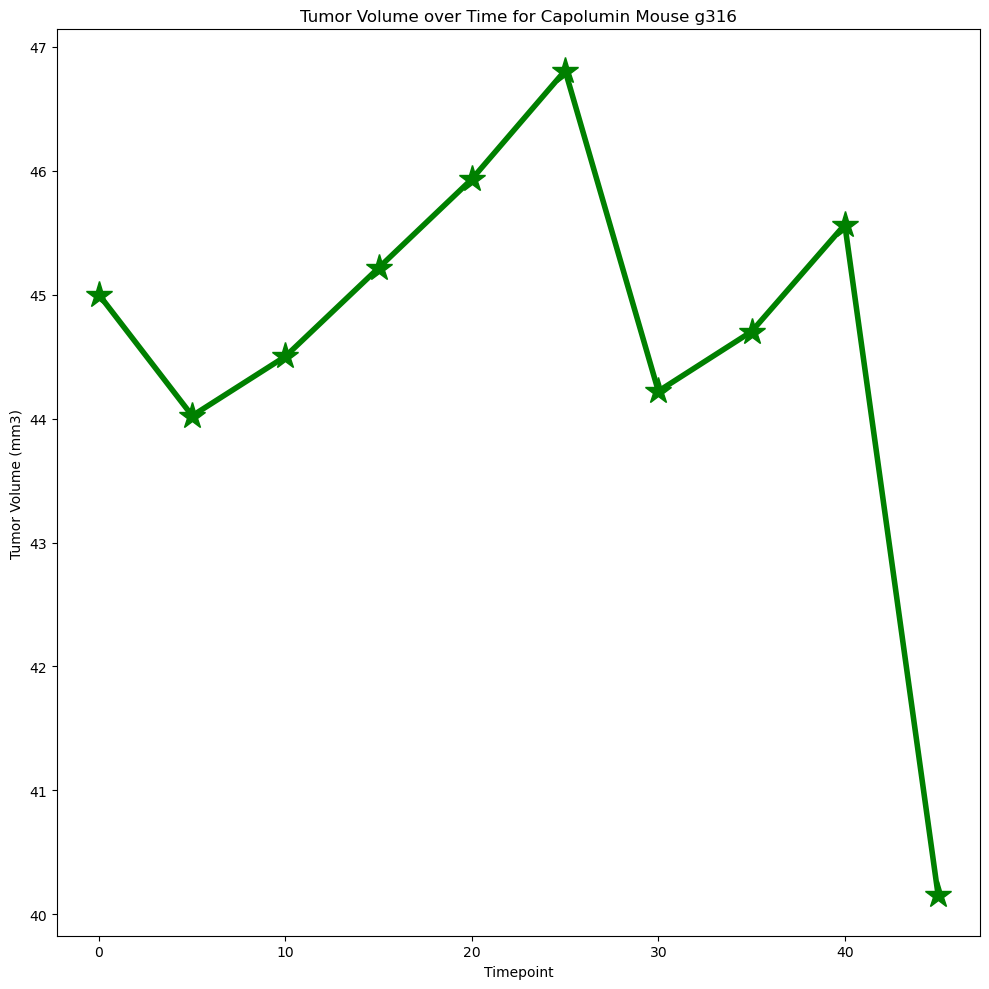

In [32]:
x_ax=linedf['Timepoint']
tumvol=linedf['Tumor Volume (mm3)']

fig1, ax1= plt.subplots(figsize=(10,10))
plt.title('Tumor Volume over Time for Capolumin Mouse g316')
plt.plot(x_ax, tumvol, linewidth=4, markersize=20, marker='*', color='g')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.tight_layout()
plt.show()
           

In [33]:
# Scatter plot for avg tumor vol vs mouse wt for Capomulin
AvgVol_Cap=Capomulin.groupby(['Mouse ID']).mean()
AvgVol_Cap.head()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.7
b742,7.0,21.0,22.5,40.083699,0.0
f966,16.0,17.0,10.0,36.505973,0.0
g288,3.0,19.0,22.5,41.990097,0.8
g316,22.0,22.0,22.5,44.613344,1.0


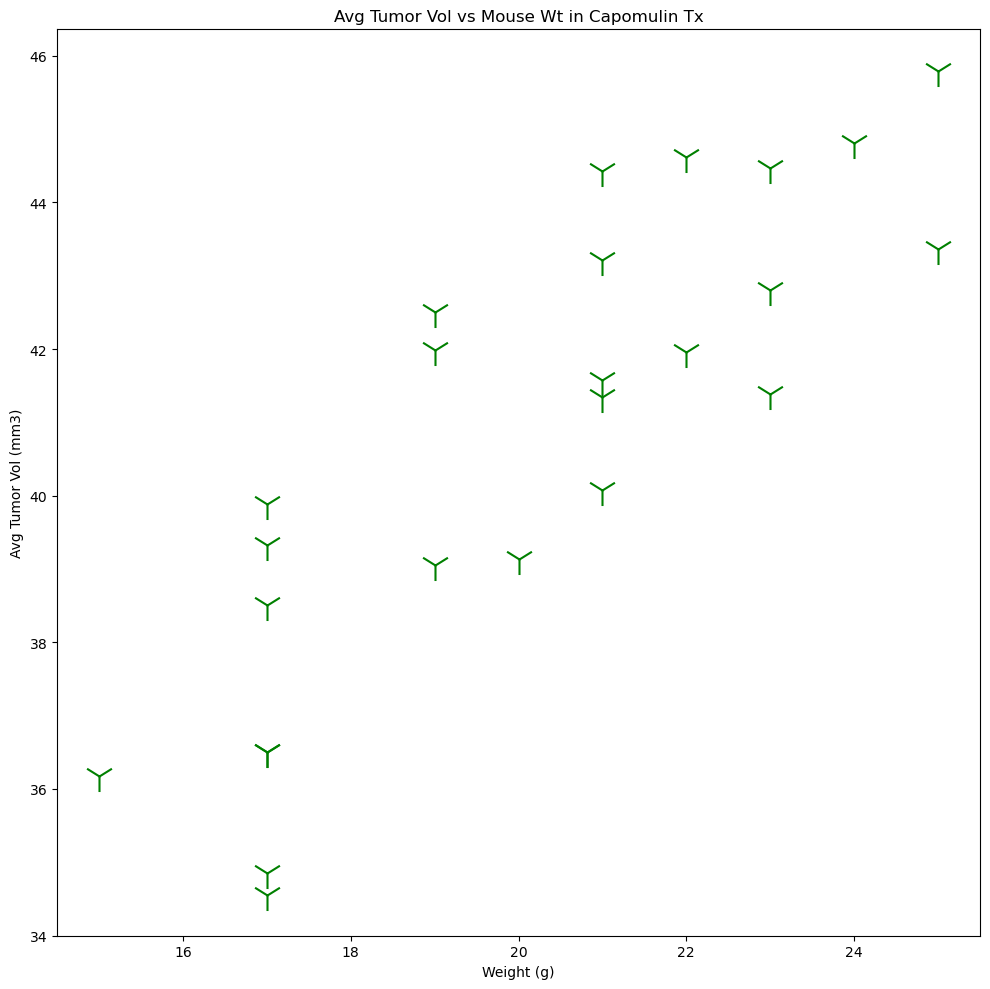

In [34]:
fig1,ax1=plt.subplots(figsize=(10,10))
plt.scatter(AvgVol_Cap['Weight (g)'], AvgVol_Cap ['Tumor Volume (mm3)'], color='g', s=500, marker='1')
plt.title('Avg Tumor Vol vs Mouse Wt in Capomulin Tx')
plt.xlabel('Weight (g)')
plt.ylabel('Avg Tumor Vol (mm3)')
plt.tight_layout()
plt.show()

In [40]:
## Calculate Correlation and Regression
# The correlation coefficient and linear regression model are calculated for mouse weight and average tumor volume for the Capomulin regimen
from scipy.stats import linregress
import numpy as np

correlation = st.pearsonr(AvgVol_Cap['Weight (g)'],AvgVol_Cap['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor vol is {round(correlation[0],2)}")

xax=AvgVol_Cap['Weight (g)']
yax=AvgVol_Cap['Tumor Volume (mm3)']




The correlation between mouse weight and the average tumor vol is 0.84


In [43]:
(slope, intercept,rvalue, pvalue, stderr)= linregress(xax, yax)
regress_values=AvgVol_Cap["Weight (g)"]* slope + intercept

print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"stderr:{stderr}")

slope:0.9544396890241049
intercept:21.552160532685008
rvalue (Correlation coefficient):0.8419363424694721
stderr:0.12754359033201323


In [45]:
equation=f"y = {round(slope, 2)} x + {round(intercept, 2)}"
print(equation)

y = 0.95 x + 21.55


r-squared: 0.709


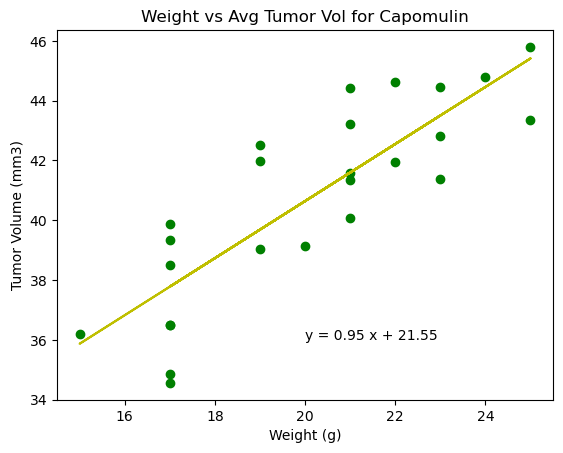

In [54]:
plt.scatter(AvgVol_Cap["Weight (g)"],AvgVol_Cap["Tumor Volume (mm3)"],color='g')
plt.plot(AvgVol_Cap["Weight (g)"], regress_values, color='y')
plt.annotate(equation,(20,36), fontsize=10)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Avg Tumor Vol for Capomulin")
print(f"r-squared: {round(rvalue**2,3)}")
plt.show()